In [2]:
import numpy as np

In [3]:
import math

In [4]:
from scipy import stats

In [5]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

## Define room's fragmentation

In [33]:
n = 3
m = 3

## Define probabilities of each cell

In [34]:
p = np.zeros((n, m))

In [35]:
for i in range(0, n):
    for j in range(0, m): 
        p[i][j] = 1

## Define mean and distribution of signal in each cell

In [36]:
mu = np.zeros((n, m))

In [37]:
alpha = 3
d0 = 4
p_d0 = -53

In [38]:
#distribution params: mean
for i in range(0, n):
    for j in range(0, m): 
        d = math.sqrt((1 - i)*(1 - i) + (1 - j)*(1 - j)) + 4
        mu[i][j] = p_d0 - 10 * alpha * math.log10(d / d0)
        
mu

array([[-56.94426173, -55.90730039, -56.94426173],
       [-55.90730039, -53.        , -55.90730039],
       [-56.94426173, -55.90730039, -56.94426173]])

In [39]:
#distribution params: variance
sigma2 = np.ones((n, m))

## The function to define the coordinates of user

In [45]:
def find_cell(x):
    cond_p = np.zeros((n, m))
    for i in range(0, n):
        for j in range(0, m):
            cond_p[i][j] = stats.norm(mu[i][j], sigma2[i][j]).pdf(x)
    
            
    print("Matrix of conditional probabilities p(x|k):")
    print (cond_p)
    return np.where(cond_p==cond_p.max())

## Tests

In [46]:
find_cell(-55.1)

Matrix of conditional probabilities p(x|k):
[[ 0.07283278  0.28799692  0.07283278]
 [ 0.28799692  0.0439836   0.28799692]
 [ 0.07283278  0.28799692  0.07283278]]


(array([0, 1, 1, 2]), array([1, 0, 2, 1]))

In [47]:
find_cell(0)

Matrix of conditional probabilities p(x|k):
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


(array([0, 0, 0, 1, 1, 1, 2, 2, 2]), array([0, 1, 2, 0, 1, 2, 0, 1, 2]))

In [48]:
find_cell(-53)

Matrix of conditional probabilities p(x|k):
[[  1.66996310e-04   5.82767992e-03   1.66996310e-04]
 [  5.82767992e-03   3.98942280e-01   5.82767992e-03]
 [  1.66996310e-04   5.82767992e-03   1.66996310e-04]]


(array([1]), array([1]))

In [49]:
find_cell(-60)

Matrix of conditional probabilities p(x|k):
[[  3.74360319e-03   9.19713373e-05   3.74360319e-03]
 [  9.19713373e-05   9.13472041e-12   9.19713373e-05]
 [  3.74360319e-03   9.19713373e-05   3.74360319e-03]]


(array([0, 0, 2, 2]), array([0, 2, 0, 2]))

## Some suplementary calculations

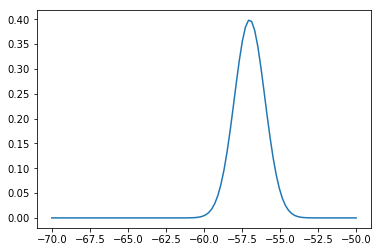

In [32]:
mean = -57
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(-70, -50, 100)
plt.plot(x,mlab.normpdf(x, m, sigma))

plt.show()

In [43]:
stats.norm.cdf(0.0, loc=0.0, scale=1.0)

0.5

In [24]:
stats.norm(-59, 1).cdf(-53)

0.9999999990134123

## Results